<a href="https://colab.research.google.com/github/Navjot8436/Data-Exploration-using-Python/blob/main/DataExplorationNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title of the Project: Multifaceted Data Analysis of Diabetes Indicators

#Brief Description :
This project aims to conduct a multifaceted analysis of diabetes indicators by examining the relationships between various clinical measurements and diabetes outcomes. It will leverage statistical and machine learning methods to uncover patterns that may inform risk prediction and management strategies.


#Group Members:
- Navjot Kaur 4358436
- Navdeep singh 4356266


#Detailed Project Description:
Diabetes mellitus is a chronic condition that requires a comprehensive understanding of various biomarkers for effective management. Our project seeks to explore multifaceted data, focusing on underrepresented factors such as insulin sensitivity, blood pressure variability, and their interactions with traditional measures like glucose and BMI. This exploration aims to identify novel predictors of diabetes risk and to enhance existing predictive models.




#Objective:
- To identify new biomarkers related to diabetes risk by examining the dataset from multiple angles.
- To utilize advanced data analysis techniques to deepen our understanding of the interplay between various clinical measurements.
- To integrate these insights into predictive models for improved accuracy in risk assessment.


#Expected Outcome:
- Identification of novel, actionable insights that could inform diabetes risk prevention strategies.
- Development of a predictive model with enhanced performance compared to standard models.
- Creation of interactive visualizations that aid healthcare professionals in interpreting complex data.





#Modification/New Addition Specification Cell:
We have incorporated the following modifications and additions into our project:

- A new analysis module that examines insulin sensitivity indices.
- A comprehensive blood pressure variability study in relation to diabetic outcomes.
- The introduction of machine learning algorithms capable of handling complex interactions between variables.


#Criteria-Specific Cell:
Our project's criteria-specific focus lies in the advanced statistical analysis of varied clinical indicators and the application of innovative machine learning models to predict diabetes outcomes more accurately.
##Relevance and Application:
The relevance of our work is underscored by the potential to improve diabetes risk prediction models, which can significantly impact public health interventions and patient outcomes. Accurate prediction models can facilitate early interventions and personalized care strategies.

##Innovation and Technical Proficiency:
The project stands out for its application of cutting-edge statistical analyses and the latest machine learning techniques to dissect the complex nature of diabetes indicators. Our team has developed custom tools for data visualization that allow for more intuitive analysis and understanding of the data.






The early diagnosis of diabetes is only possible by proper assessment of both common and less common sign symptoms, which could be found in different phases from disease initiation up to diagnosis. Data mining classification techniques have been well accepted by researchers for risk prediction model of the disease. To predict the likelihood of having diabetes requires a dataset, which contains the data of newly diabetic or would be diabetic patient. In this work, we have used such a dataset of 520 instances, which has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh. We have analyzed the dataset with Naive Bayes Algorithm, Logistic Regression Algorithm, and Random Forest Algorithm and after applying tenfold Cross- Validation and Percentage Split evaluation techniques, Random forest has been found having best accuracy on this dataset. Finally, a commonly accessible, user-friendly tool for the end user to check the risk of having diabetes from assessing the symptoms and useful tips to control over the risk factors has been proposed.
Paper link:https://link.springer.com/chapter/10.1007/978-981-13-8798-2_12?ref=https://coder.social

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print(RandomForestClassifier(n_estimators=100))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
#url= 'https://drive.google.com/file/d/1N6ippAXm_zX1r4jrM10rrGNDJ5yBf5ST/view?usp=sharing'
url= 'https://drive.google.com/file/d/1asit0DWv9yRCERtpKlyM2HCFNI4YAupn/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
ds = pd.read_csv(dwn_url)
ds.head(100)

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,yes
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,yes
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0,yes
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,yes
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,1,0,0,1,1,0,0,1,0,0,0,yes
96,1,1,1,1,0,0,0,1,0,1,1,1,0,0,yes
97,1,1,1,1,1,0,0,1,1,0,1,1,0,0,yes
98,1,1,0,0,0,0,1,0,0,0,0,0,1,0,yes


In [ ]:
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
    for col_name in data.columns:
        data[col_name] = number.fit_transform(data[col_name])
        data=data.fillna(-999)
    return data

In [ ]:
dataset = convert(ds)
dataset.head(100)

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1
96,1,1,1,1,0,0,0,1,0,1,1,1,0,0,1
97,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1
98,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [ ]:
X = dataset.drop('class', axis=1)
Y = dataset['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
  from sklearn.externals import joblib
  import pickle

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
 filename = "Completed_model.joblib"
 joblib.dump(random_forest, filename)

['Completed_model.joblib']

In [ ]:
   loaded_model = joblib.load(filename)
   result = loaded_model.score(X_test, Y_test)
   print(result)

1.0


In [ ]:
 print(random_forest.predict([X_test.iloc[3]])) #A single instance in the test dataset

[1]


In [ ]:

url= 'https://drive.google.com/file/d/1asit0DWv9yRCERtpKlyM2HCFNI4YAupn/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dst = pd.read_csv(dwn_url)
dst.head(20)



,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,yes
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,yes
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0,yes
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,yes
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,yes
5,1,1,0,1,1,0,1,1,0,1,0,1,1,1,yes
6,1,1,0,1,1,1,0,0,0,1,1,0,0,0,yes
7,1,1,1,1,0,0,1,1,1,0,1,1,0,0,yes
8,1,1,0,1,1,1,0,1,1,0,1,1,0,1,yes
9,0,1,1,1,1,0,1,1,1,0,0,0,1,0,yes


In [ ]:
test_data = convert(dst)

In [ ]:
X_test_csv  = test_data.drop("class", axis=1)
Y_test_csv = test_data["class"]

In [ ]:
pip install lime


     |████████████████████████████████| 275 kB 3.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ed22a120de2e59041738926fb0364a3d67b17ed1f1bb9ef6077387916d46ff64
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime import lime_tabular
# Explainer function varies differently. Please see the documentation. Search by lime_tabular.LimeTabularExplainer
#LIME documentation: https://lime-ml.readthedocs.io/en/latest/lime.html
#Download in PDF:https://readthedocs.org/projects/lime-ml/downloads/pdf/latest/
explainer_DT = lime_tabular.LimeTabularExplainer(training_data = X_train.values, mode='classification', training_labels=None, feature_names= X_train.columns,
categorical_features=None, categorical_names=None, kernel_width=None, verbose=False, class_names=None, feature_selection='auto', discretize_continuous=True, discretizer='quartile')

In [ ]:
  loaded_model = joblib.load(filename)
  result = loaded_model.score(X_test_csv, Y_test_csv)
  result2 = loaded_model.predict([X_test_csv.iloc[120]])  #A single instance in the test dataset
  exres = loaded_model.predict_proba
  print(result2)

[1]


In [ ]:
 exp_svm = explainer_DT.explain_instance(X_test_csv.iloc[280], exres)
 exp_svm.show_in_notebook(show_predicted_value= True)
 print(exp_svm)

In [ ]:
list = exp_svm.as_list()
print(exp_svm.as_list())

[('Polyuria <= 0.00', -0.2671396158313298), ('Polydipsia <= 0.00', -0.21576932421111578), ('0.00 < sudden weight loss <= 1.00', 0.08326417656885635), ('Itching <= 0.00', 0.05980313791174352), ('Polyphagia <= 0.00', -0.055761216012045756), ('Irritability <= 0.00', -0.0504820110198755), ('muscle stiffness <= 0.00', 0.0380171138995098), ('Alopecia <= 0.00', 0.03761250555563519), ('visual blurring <= 0.00', -0.035669784334901505), ('Genital thrush <= 0.00', -0.03531649775067575)]


In [ ]:
X_test_csv.iloc[280]

Polyuria              0
Polydipsia            0
sudden weight loss    1
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               1
Name: 280, dtype: int64

#1: Import libraries of python to create graphs.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#2: importing the file in google colab.


In [2]:

from google.colab import files
uploaded = files.upload()

Saving Diabetes.csv to Diabetes.csv


#Step 3: Showing the Dataset


In [3]:

func = pd.read_csv("Diabetes.csv")
func

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,class
0,6,148,72,35,0,33.6,0.627,50,Sick
1,1,85,66,29,0,26.6,0.351,31,Healthy
2,8,183,64,0,0,23.3,0.672,32,Sick
3,1,89,66,23,94,28.1,0.167,21,Healthy
4,0,137,40,35,168,43.1,2.288,33,Sick
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,Healthy
764,2,122,70,27,0,36.8,0.340,27,Healthy
765,5,121,72,23,112,26.2,0.245,30,Healthy
766,1,126,60,0,0,30.1,0.349,47,Sick


#Step 4: Data Refining

In [4]:
function = func.drop([], axis=1)
function.head(5)

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,class
0,6,148,72,35,0,33.6,0.627,50,Sick
1,1,85,66,29,0,26.6,0.351,31,Healthy
2,8,183,64,0,0,23.3,0.672,32,Sick
3,1,89,66,23,94,28.1,0.167,21,Healthy
4,0,137,40,35,168,43.1,2.288,33,Sick


In [5]:

print("number of null values :")
print(function.isnull().sum())

number of null values :
Pregnancies         0
PG Concentration    0
Diastolic BP        0
Tri Fold Thick      0
Serum Ins           0
BMI                 0
DP Function         0
Age                 0
class               0
dtype: int64


In [6]:

function = function.dropna() # Dropping the missing values.
function.count()

Pregnancies         768
PG Concentration    768
Diastolic BP        768
Tri Fold Thick      768
Serum Ins           768
BMI                 768
DP Function         768
Age                 768
class               768
dtype: int64

In [7]:
duplicate_rows_function = function[function.duplicated()]
print("number of duplicate rows: ", duplicate_rows_function.shape)

number of duplicate rows:  (0, 9)


In [8]:
print("Summary statistics:")
print(function.describe())

Summary statistics:
       Pregnancies  PG Concentration  Diastolic BP  Tri Fold Thick  \
count   768.000000        768.000000    768.000000      768.000000   
mean      3.845052        120.894531     69.105469       20.536458   
std       3.369578         31.972618     19.355807       15.952218   
min       0.000000          0.000000      0.000000        0.000000   
25%       1.000000         99.000000     62.000000        0.000000   
50%       3.000000        117.000000     72.000000       23.000000   
75%       6.000000        140.250000     80.000000       32.000000   
max      17.000000        199.000000    122.000000       99.000000   

        Serum Ins         BMI  DP Function         Age  
count  768.000000  768.000000   768.000000  768.000000  
mean    79.799479   31.992578     0.471876   33.240885  
std    115.244002    7.884160     0.331329   11.760232  
min      0.000000    0.000000     0.078000   21.000000  
25%      0.000000   27.300000     0.243750   24.000000  
50%    

#Graph1. Insulin Sensitivity Scatter Plot
This graph illustrates the relationship between serum insulin levels and BMI, categorized by diabetes class. It can potentially reveal how insulin levels vary with BMI among diabetic and non-diabetic individuals.

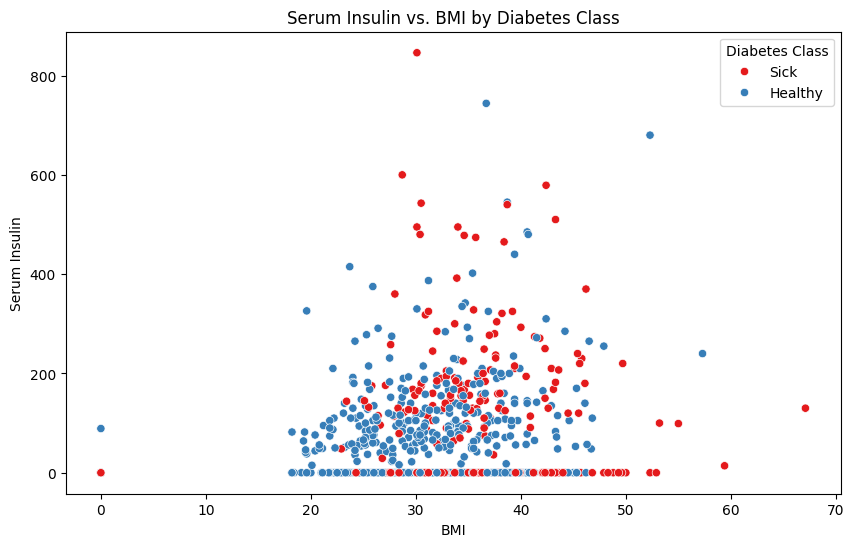

In [9]:
diabetes_data = pd.read_csv('Diabetes.csv')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Serum Ins', hue='class', data=diabetes_data, palette='Set1')
plt.title('Serum Insulin vs. BMI by Diabetes Class')
plt.xlabel('BMI')
plt.ylabel('Serum Insulin')
plt.legend(title='Diabetes Class')
plt.show()






#Graph2. Blood Pressure Variability Box Plot:
This plot provides insights into the variability of diastolic blood pressure among the different classes. It is a useful visualization for examining the spread and central tendencies of blood pressure readings in the context of diabetes.








<ipython-input-10-ad2aeefcfa66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='Diastolic BP', data=diabetes_data, palette='Set2')


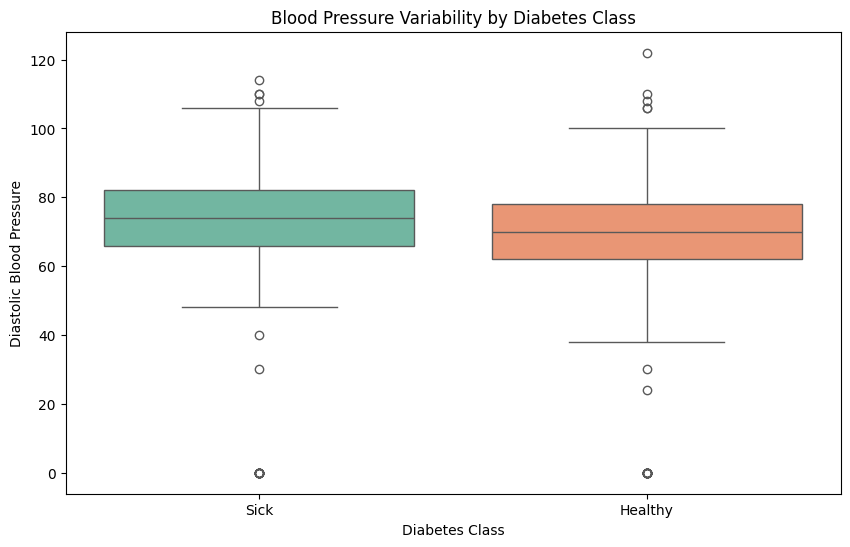

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Diastolic BP', data=diabetes_data, palette='Set2')
plt.title('Blood Pressure Variability by Diabetes Class')
plt.xlabel('Diabetes Class')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

#Graph3. Distribution of Diastolic Blood Pressure

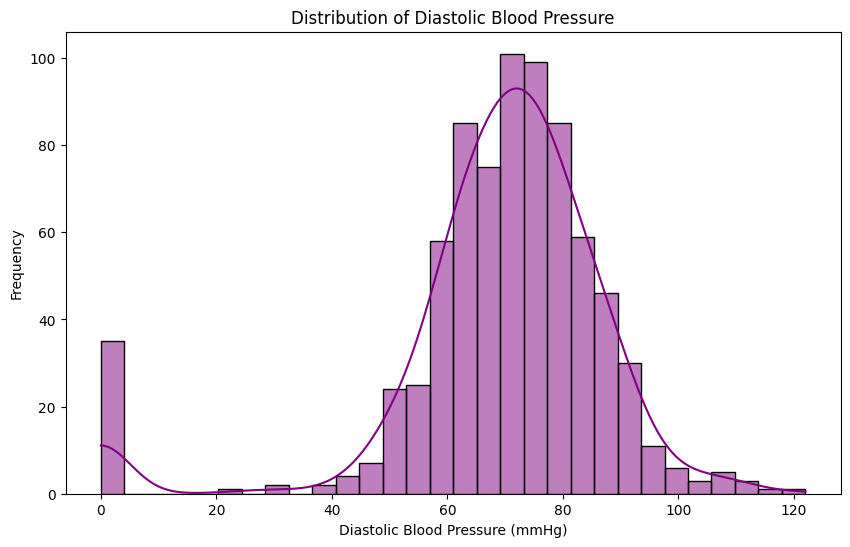

In [11]:

plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['Diastolic BP'], kde=True, bins=30, color='purple')
plt.title('Distribution of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.show()



#Graph4. Age Distribution by Diabetes Class

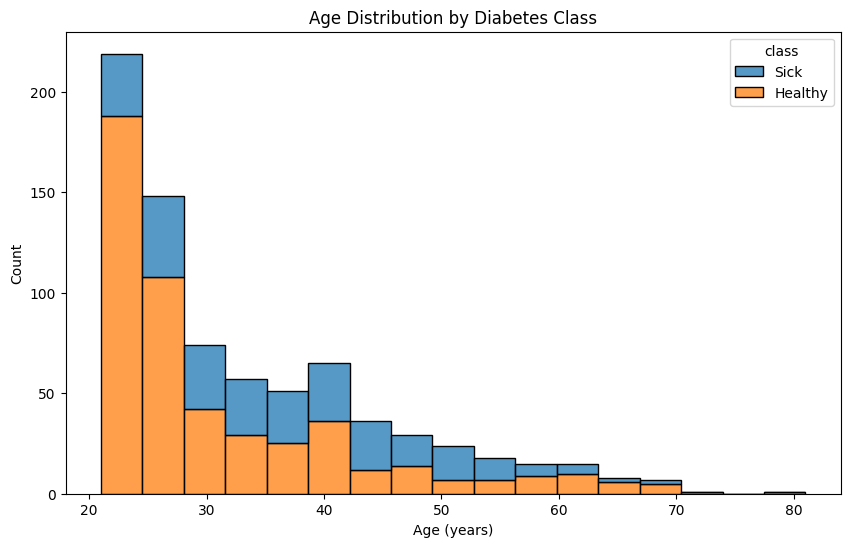

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetes_data, x='Age', hue='class', multiple='stack', palette='tab10')
plt.title('Age Distribution by Diabetes Class')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

#5. Serum Insulin Levels vs. PG Concentration:

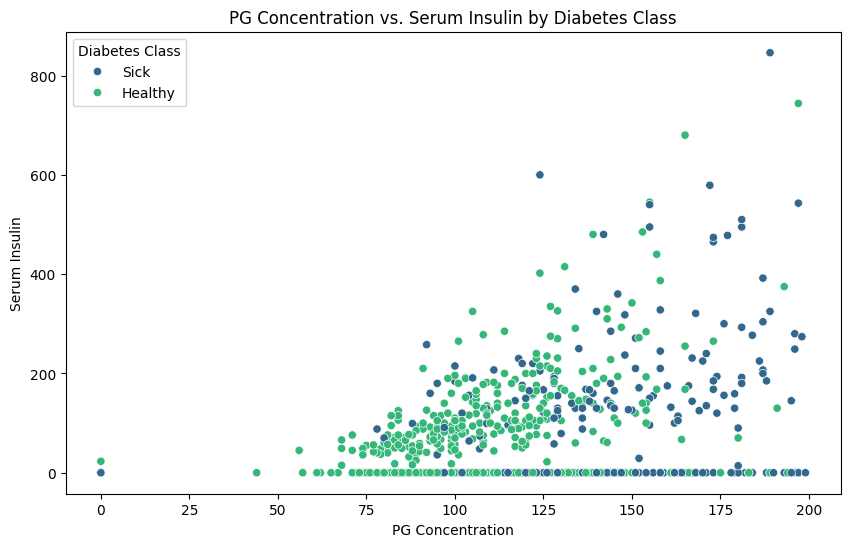

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PG Concentration', y='Serum Ins', hue='class', data=diabetes_data, palette='viridis')
plt.title('PG Concentration vs. Serum Insulin by Diabetes Class')
plt.xlabel('PG Concentration')
plt.ylabel('Serum Insulin')
plt.legend(title='Diabetes Class')
plt.show()


#Graph6. Pair Plot for Selected Features

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


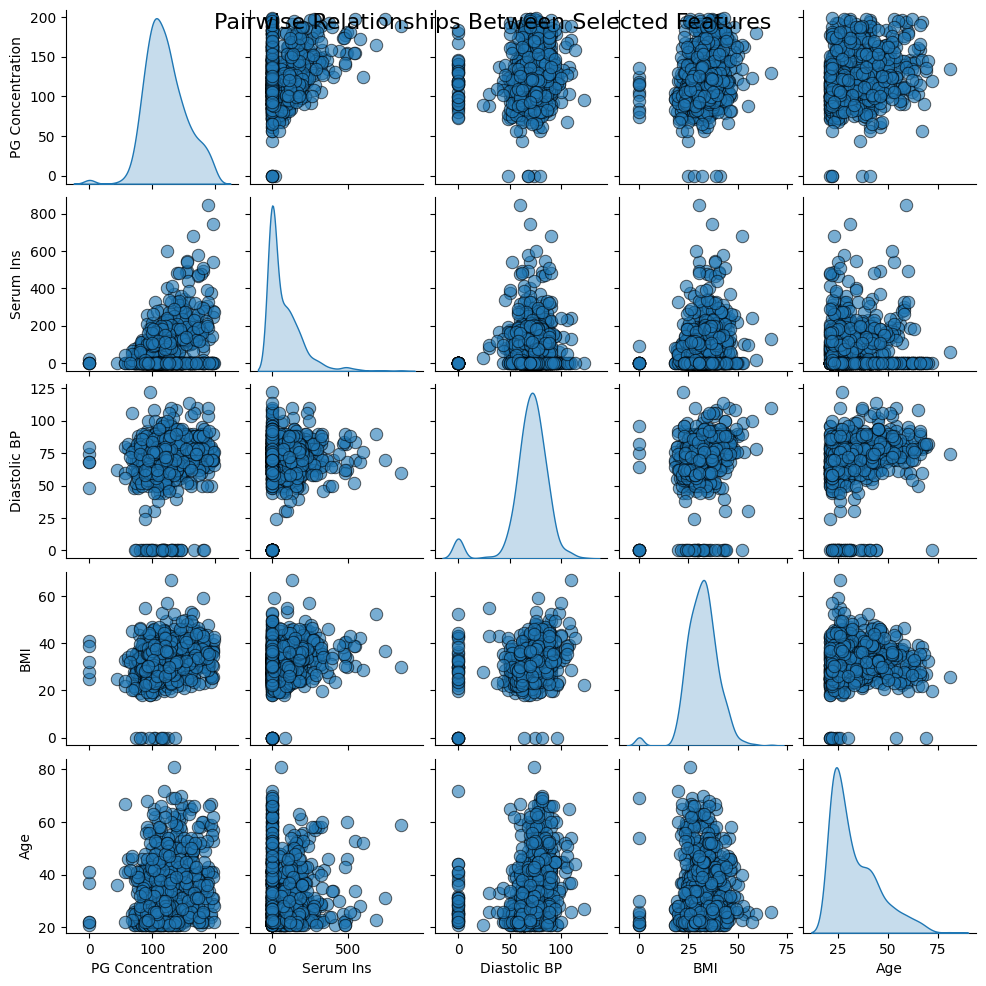

In [13]:
selected_features = ['PG Concentration', 'Serum Ins', 'Diastolic BP', 'BMI', 'Age']
sns.pairplot(diabetes_data[selected_features], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size=2)
plt.suptitle('Pairwise Relationships Between Selected Features', size=16)
plt.show()

#Graph8. Serum Insulin Levels vs. PG Concentration by Age

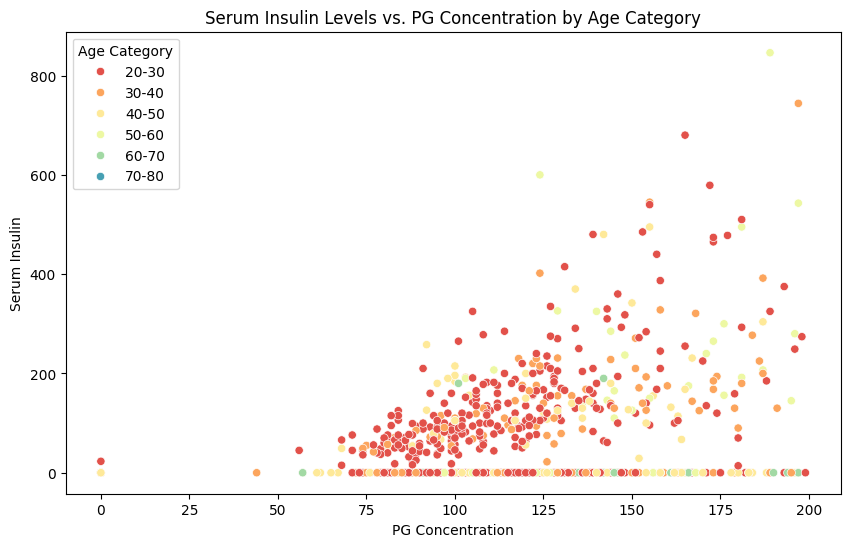

In [14]:
diabetes_data['Age Category'] = pd.cut(diabetes_data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PG Concentration', y='Serum Ins', hue='Age Category', data=diabetes_data, palette='Spectral')
plt.title('Serum Insulin Levels vs. PG Concentration by Age Category')
plt.xlabel('PG Concentration')
plt.ylabel('Serum Insulin')
plt.legend(title='Age Category')
plt.show()

#Reference:

- Plotly Technologies Inc. (2015). Plotly Python Graphing Library. Retrieved from https://plotly.com/python/

- Matplotlib 3.8.2 documentation. https://matplotlib.org/stable/index.html

- Python.org. https://www.python.org/doc/

- API Reference — Matplotlib 3.8.2 documentation. https://matplotlib.org/stable/api/index

- Pyplot tutorial — Matplotlib 3.8.2 documentation. https://matplotlib.org/stable/tutorials/pyplot.html


#Thankyou